In [2]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pytz
from pylab import mpl, plt

In [3]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [4]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [5]:
ativo_analise = 'WDOH22'
df_analise = mt5.copy_ticks_from(ativo_analise, datetime(2022, 1, 2),100000000, mt5.COPY_TICKS_ALL)
df_analise = pd.DataFrame(df_analise)
df_analise['time'] = pd.to_datetime(df_analise['time'], unit='s')
df_analise.drop(['flags', 'time_msc', 'volume_real'], axis = 1, inplace=True)
df_analise.set_index('time', inplace=True)
df_analise['M1000'] = ta.sma(df_analise['last'], length=1000)
df_analise['M5000'] = ta.sma(df_analise['last'], length=5000)
df_analise['M10000'] = ta.sma(df_analise['last'], length=10000)
df_analise

,bid,ask,last,volume,M1000,M5000,M10000
time,,,,,,,
2022-01-03 09:03:00,0.0,5728.0,0.0,0,NaN,NaN,NaN
2022-01-03 09:03:59,5673.0,5728.0,0.0,0,NaN,NaN,NaN
2022-01-03 09:04:06,0.0,5728.0,0.0,0,NaN,NaN,NaN
2022-01-03 09:04:29,0.0,5700.0,0.0,0,NaN,NaN,NaN
2022-01-03 09:04:56,0.0,5675.0,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-04 18:29:59,5359.5,5360.0,5361.0,1,5357.0165,5356.3730,5354.23310
2022-02-04 18:29:59,5359.0,5361.0,5361.0,1,5357.0225,5356.3741,5354.23415
2022-02-04 18:29:59,5359.0,5361.0,5359.0,4,5357.0260,5356.3748,5354.23495


In [6]:
df_analise['Dist1k'] = df_analise['M1000']-df_analise['last']
df_analise['Dist5k'] = df_analise['M5000']-df_analise['last']
df_analise['Dist10k'] = df_analise['M10000']-df_analise['last']

In [7]:
df = df_analise.loc['2022-02-02 09:30:00' : '2022-02-02 16:30:00']
df

,bid,ask,last,volume,M1000,M5000,M10000,Dist1k,Dist5k,Dist10k
time,,,,,,,,,,
2022-02-02 09:30:00,5297.0,5297.5,5297.0,2,5298.1225,5299.2473,5299.08155,1.1225,2.2473,2.08155
2022-02-02 09:30:00,5297.0,5297.5,5297.5,59,5298.1195,5299.2474,5299.08140,0.6195,1.7474,1.58140
2022-02-02 09:30:00,5297.0,5297.5,5297.5,69,5298.1170,5299.2475,5299.08120,0.6170,1.7475,1.58120
2022-02-02 09:30:00,5297.0,5297.5,5298.0,1,5298.1150,5299.2476,5299.08110,0.1150,1.2476,1.08110
2022-02-02 09:30:00,5297.0,5297.5,5298.0,18,5298.1125,5299.2478,5299.08095,0.1125,1.2478,1.08095
...,...,...,...,...,...,...,...,...,...,...
2022-02-02 16:30:00,5320.0,5320.5,5320.5,211,5320.2340,5319.5284,5318.79350,-0.2660,-0.9716,-1.70650
2022-02-02 16:30:00,5320.0,5320.5,5320.5,2,5320.2365,5319.5285,5318.79380,-0.2635,-0.9715,-1.70620
2022-02-02 16:30:00,5320.0,5320.5,5320.0,1,5320.2385,5319.5285,5318.79405,0.2385,-0.4715,-1.20595


In [8]:
df = df[df['volume'] > 0]

In [9]:
df

,bid,ask,last,volume,M1000,M5000,M10000,Dist1k,Dist5k,Dist10k
time,,,,,,,,,,
2022-02-02 09:30:00,5297.0,5297.5,5297.0,2,5298.1225,5299.2473,5299.08155,1.1225,2.2473,2.08155
2022-02-02 09:30:00,5297.0,5297.5,5297.5,59,5298.1195,5299.2474,5299.08140,0.6195,1.7474,1.58140
2022-02-02 09:30:00,5297.0,5297.5,5297.5,69,5298.1170,5299.2475,5299.08120,0.6170,1.7475,1.58120
2022-02-02 09:30:00,5297.0,5297.5,5298.0,1,5298.1150,5299.2476,5299.08110,0.1150,1.2476,1.08110
2022-02-02 09:30:00,5297.0,5297.5,5298.0,18,5298.1125,5299.2478,5299.08095,0.1125,1.2478,1.08095
...,...,...,...,...,...,...,...,...,...,...
2022-02-02 16:30:00,5320.0,5320.5,5320.5,211,5320.2340,5319.5284,5318.79350,-0.2660,-0.9716,-1.70650
2022-02-02 16:30:00,5320.0,5320.5,5320.5,2,5320.2365,5319.5285,5318.79380,-0.2635,-0.9715,-1.70620
2022-02-02 16:30:00,5320.0,5320.5,5320.0,1,5320.2385,5319.5285,5318.79405,0.2385,-0.4715,-1.20595


In [10]:
#df = df[1000:101000]
df

,bid,ask,last,volume,M1000,M5000,M10000,Dist1k,Dist5k,Dist10k
time,,,,,,,,,,
2022-02-02 09:30:00,5297.0,5297.5,5297.0,2,5298.1225,5299.2473,5299.08155,1.1225,2.2473,2.08155
2022-02-02 09:30:00,5297.0,5297.5,5297.5,59,5298.1195,5299.2474,5299.08140,0.6195,1.7474,1.58140
2022-02-02 09:30:00,5297.0,5297.5,5297.5,69,5298.1170,5299.2475,5299.08120,0.6170,1.7475,1.58120
2022-02-02 09:30:00,5297.0,5297.5,5298.0,1,5298.1150,5299.2476,5299.08110,0.1150,1.2476,1.08110
2022-02-02 09:30:00,5297.0,5297.5,5298.0,18,5298.1125,5299.2478,5299.08095,0.1125,1.2478,1.08095
...,...,...,...,...,...,...,...,...,...,...
2022-02-02 16:30:00,5320.0,5320.5,5320.5,211,5320.2340,5319.5284,5318.79350,-0.2660,-0.9716,-1.70650
2022-02-02 16:30:00,5320.0,5320.5,5320.5,2,5320.2365,5319.5285,5318.79380,-0.2635,-0.9715,-1.70620
2022-02-02 16:30:00,5320.0,5320.5,5320.0,1,5320.2385,5319.5285,5318.79405,0.2385,-0.4715,-1.20595


In [11]:
def percentil(data, up=90, down=10):
    x = data
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

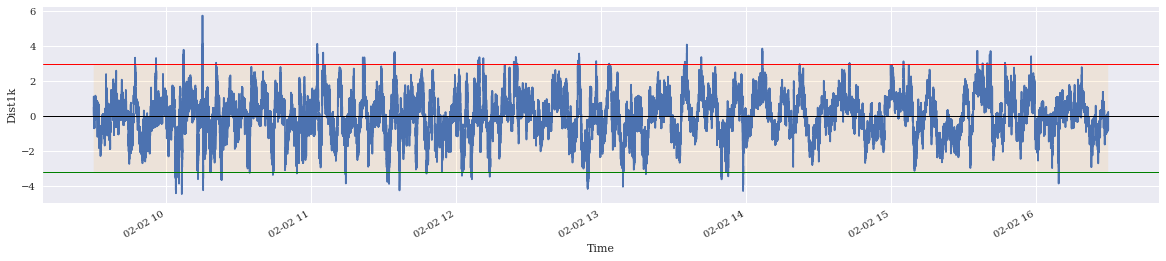

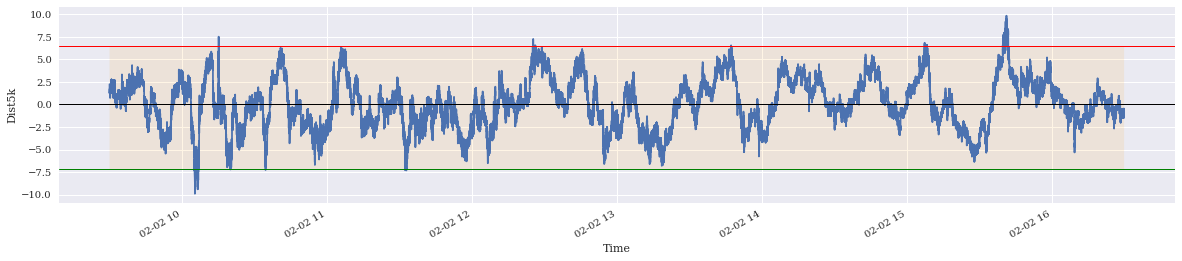

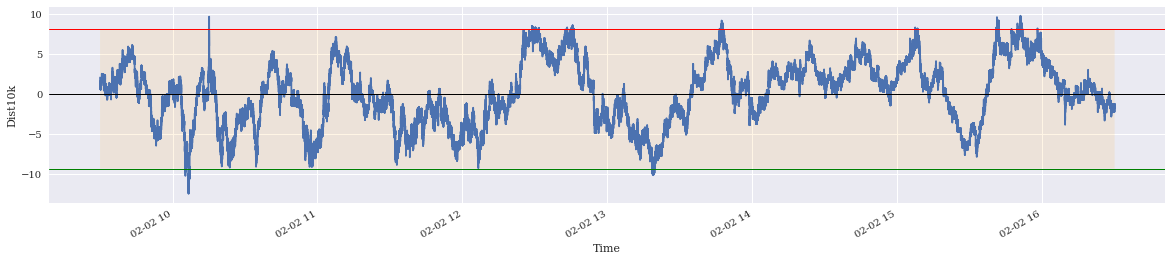

In [12]:
plt.rcParams['figure.figsize'] = (20,4)

per_dist1k = percentil(df['Dist1k'], up=99, down=1)
ax = df['Dist1k'].plot()
ax.fill_between(df.index, per_dist1k[0], per_dist1k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist1k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist1k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist1k')
plt.show()

per_dist5k = percentil(df['Dist5k'], up=99, down=1)
ax = df['Dist5k'].plot()
ax.fill_between(df.index, per_dist5k[0], per_dist5k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist5k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist5k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist5k')
plt.show()

per_dist10k = percentil(df['Dist10k'], up=99, down=1)
ax = df['Dist10k'].plot()
ax.fill_between(df.index, per_dist10k[0], per_dist10k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist10k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist10k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist10k')
plt.show()

In [13]:
df['Dist1k'].describe()

count    187490.000000
mean         -0.060186
std           1.472029
min          -4.445000
25%          -1.188500
50%          -0.010000
75%           1.050500
max           5.757500
Name: Dist1k, dtype: float64

In [14]:
df['Dist5k'].describe()

count    187490.000000
mean         -0.267877
std           3.284595
min          -9.907300
25%          -2.754375
50%          -0.291800
75%           2.229400
max           9.852700
Name: Dist5k, dtype: float64

In [15]:
df['Dist10k'].describe()

count    187490.000000
mean         -0.532749
std           4.550777
min         -12.397700
25%          -4.304800
50%          -0.471450
75%           3.001337
max           9.775700
Name: Dist10k, dtype: float64